In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.7/510.7 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 24.4 MB/s eta 0:00:00


In [2]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 40.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr
import cv2
import ultralytics
from google.colab.patches import cv2_imshow
ultralytics.checks()

Ultralytics YOLOv8.0.71 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/107.7 GB disk)


In [4]:
!yolo task=detect mode=predict model=/content/best100.pt conf=0.8 source= /content/test.jpg save=True save_txt = True

2023-04-09 20:06:56.336637: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-09 20:06:57.445300: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.71 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/test.jpg: 384x640 1 car, 1 plate, 458.8ms
Speed: 1.9ms preprocess, 458.8ms inference, 28.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


In [5]:
label_path = '/content/runs/detect/predict/labels/test.txt'

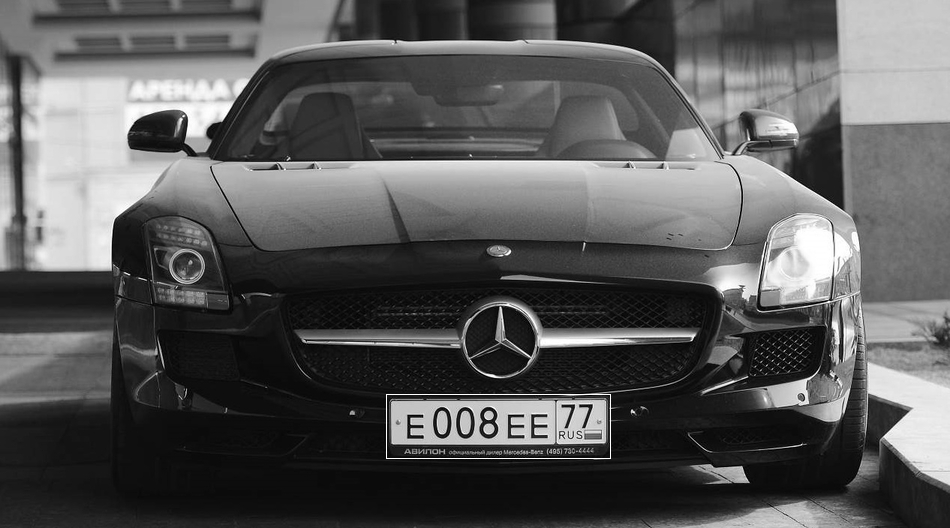

In [6]:
# Загрузка меток из тектстового документа, далее находим только метки номерных знаков.
File_data = np.loadtxt(label_path, dtype=float)
if File_data.ndim == 1:
    if File_data[0] == 1: 
        x_0 = File_data[1]
        y_0 = File_data[2]
        h_2 = File_data[3]
        w_2 = File_data[4]
        mask = np.array([x_0,y_0,h_2,w_2])
    else:
      print('Номерных знаков на изображении нет')
else:
    for i in range(len(File_data)):
      if File_data[i][0] == 1:
            x_0 = File_data[i][1]
            y_0 = File_data[i][2]
            h_2 = File_data[i][3]
            w_2 = File_data[i][4]
            mask = np.array([x_0,y_0,h_2,w_2])
      else:
        continue

# Координаты х у
x0 = mask[0] - mask[2]/2
y0 = mask[1] - mask[3]/2
x1 = mask[0] + mask[2]/2
y1 = mask[1] + mask[3]/2

IMAGE = '/content/test.jpg'

cvmat = cv2.imread(IMAGE,0)

h,w = cvmat.shape

offset = 5

# Учет высоты и ширины

start_point = (int(x0 * w), int(y0 * h))

end_point   = (int(x1 * w), int(y1 * h))

# Bounding box

cvmat = cv2.rectangle(cvmat, start_point, end_point, (255, 0, 0), 1)

cv2_imshow(cvmat)

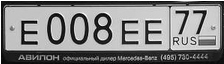

In [7]:
crop_img = cvmat[start_point[1]:end_point[1], start_point[0]:end_point[0]]
cv2_imshow(crop_img)

In [14]:
# Подготовка данных
equ = cv2.equalizeHist(crop_img)
blur = cv2.GaussianBlur(equ, (5, 5), 1)

# Ограничения
th2 = 100 # this threshold might vary!
blur[blur>=th2] = 255
blur[blur<th2]  = 0
# OCR
reader = easyocr.Reader(['en'])
output = reader.readtext(blur)

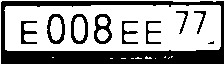

Выход после OCR : EOO8EE 77


In [15]:
cv2_imshow(blur)
print('Выход после OCR :', output[0][1])